---

# *Criando relatórios usando a FinQuant*

Vamos trabalhar algumas bibliotecas, nomeadamente:

* FinQuant
* QuantStats
* RiskFolio

E por último, vamos colocar isso num PDF com a biblioteca FPDF.

# *Arrumando Bugs para baixar a riskfolio-lib*

In [27]:
#1º Passo
# !pip uninstall matplotlib
# !pip install matplotlib

# 2º passo
# exit()

# 3º passo
# !pip install cvxpy

# 4º passo
# !pip install pybind11

## *1. Instalações e Importações*

In [1]:
!pip install riskfolio-lib

  Obtaining dependency information for riskfolio-lib from https://files.pythonhosted.org/packages/e7/8e/0a0c8bfccc7a7977673443a8384e410e5d90657e56aea7a9bfd799fb8aad/Riskfolio_Lib-6.0.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for arch>=5.4 from https://files.pythonhosted.org/packages/24/b4/41ffe91f46eb3f49bf022c66f8768f469617329718d4246953ad3853c073/arch-6.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 262.6 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/257.7 kB 245.8 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/257.7 kB

In [2]:
!pip install pybind11

In [3]:
!pip install cvxpy

In [38]:
!pip install FPDF

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for FPDF: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40713 sha256=db1db37e4e763b0b78b45ed2b1dab959e676e5eb7d2df7092cd4b9695fc4ec49
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\65\4f\66\bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built FPDF


In [39]:
# Importações
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import riskfolio as rp
from fpdf import FPDF
warnings.filterwarnings('ignore')

## *2. In sample data*

In [17]:
#Período
inicio = '2017-01-01'
fim = '2022-08-30'

#Seleção dos ativos da carteira
ativos = ['PRIO3.SA','VALE3.SA', 'ITUB3.SA','HYPE3.SA', 'TAEE11.SA' ,'WEGE3.SA', 'IVVB11.SA','BTC-USD']

#Peso da carteira anteriormente
peso_in = np.array([0.10,0.10,0.15,0.15,0.15,0.15,0.10,0.10])

## *3.Download dos dados*

In [18]:
carteira = yf.download(ativos, start=inicio, end=fim)['Adj Close']
carteira.head()

[*********************100%%**********************]  8 of 8 completed


Ticker,BTC-USD,HYPE3.SA,ITUB3.SA,IVVB11.SA,PRIO3.SA,TAEE11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,1021.750000,20.291054,13.594588,78.639999,0.465253,10.826263,15.730233,5.183269
2017-01-03,1043.839966,20.857063,14.002380,76.250000,0.526954,10.846498,16.426985,5.444149
2017-01-04,1154.729980,20.981123,14.203988,75.940002,0.524358,10.750381,16.131964,5.313708
2017-01-05,1013.380005,20.965618,14.231478,75.260002,0.539134,10.800971,16.747112,5.299978


## *4. Calculo dos parâmetros*

In [19]:
#Retornos
retorno_carteira = carteira.pct_change().dropna()

#Covariância
cov_in = retorno_carteira.cov()

In [20]:
# Pesos da carteira
pesos_in = pd.DataFrame(data={'pesos_in':peso_in},index=ativos)
pesos_in

,pesos_in
PRIO3.SA,0.10
VALE3.SA,0.10
ITUB3.SA,0.15
HYPE3.SA,0.15
TAEE11.SA,0.15
WEGE3.SA,0.15
IVVB11.SA,0.10
BTC-USD,0.10


## *5. Retorno out of sample*

In [21]:
out_inicio = '2022-09-01'
out_fim = '2024-09-11'

#Download dos dados
carteira_out = yf.download(ativos, start = out_inicio, end = out_fim)['Adj Close']

#Calculo Retorno
retorno_out = carteira_out.pct_change().dropna()

#Matriz covariancia out-of-sample
cov_out = retorno_out.cov()

display(retorno_out.head())

[*********************100%%**********************]  8 of 8 completed


Ticker,BTC-USD,HYPE3.SA,ITUB3.SA,IVVB11.SA,PRIO3.SA,TAEE11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,
2022-09-02,-0.007819,0.000915,0.014363,-0.021020,0.020221,-0.003313,-0.015182,0.064482
2022-09-03,-0.006895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-09-04,0.007797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-09-05,-0.008723,-0.002514,0.010619,-0.002460,0.064505,0.003324,0.036554,0.022840
2022-09-06,-0.049197,-0.016495,-0.002627,0.008969,-0.027759,-0.006152,-0.023766,-0.019741


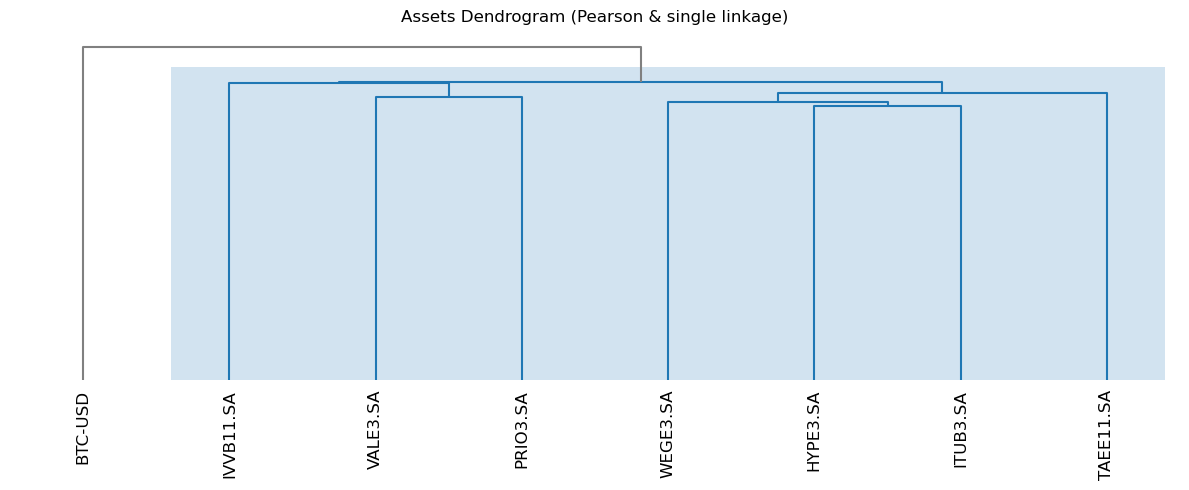

In [22]:
# Dendrograma dos ativos
ax = rp.plot_dendrogram(returns=retorno_carteira,
                      codependence='pearson',
                      linkage='single',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      ax=None)

## *6. Modelo de otimização*

<br>

- Marcos López de Prado. Building diversified portfolios that outperform out of sample. The Journal of Portfolio Management, 42(4):59–69, 2016. URL: https://jpm.pm-research.com/content/42/4/59, arXiv:https://jpm.pm-research.com/content/42/4/59.full.pdf, doi:10.3905/jpm.2016.42.4.059.

<br>

- Copyright (c) 2020-2022, Dany Cajas All rights reserved.  
    fonte: https://riskfolio-lib.readthedocs.io/en/latest/index.html

In [23]:
pd.options.display.float_format = '{:.4%}'.format

portfolio = rp.HCPortfolio(returns=retorno_carteira)

model='HRP' 
codependence = 'pearson'
rm = 'MV' 
rf = 0 # 
linkage = 'single' 

leaf_order = True 

pesos = portfolio.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      leaf_order=leaf_order)
display(pesos)

,weights
BTC-USD,2.4642%
HYPE3.SA,9.6399%
ITUB3.SA,12.5782%
IVVB11.SA,33.3972%
PRIO3.SA,2.8575%
TAEE11.SA,23.7149%
VALE3.SA,7.4596%
WEGE3.SA,7.8884%


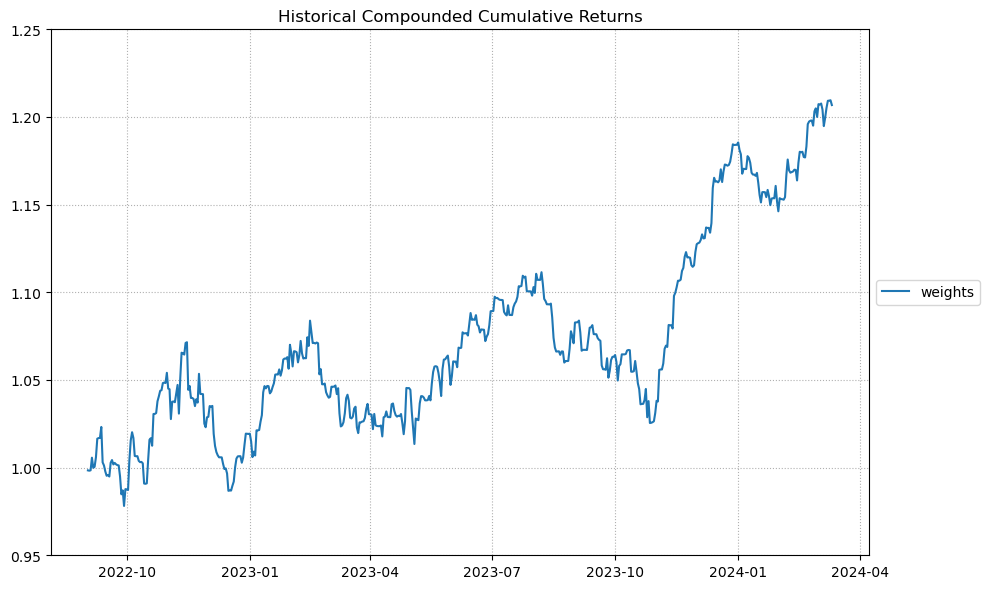

In [24]:
#Retorno out of sample
fig_2, ax_2 = plt.subplots(figsize=(1,1))

rp.plot_series(returns=retorno_out, w=pesos, cmap='tab20', height=6, width=10,
                    ax=None)
plt.savefig('cum_ret.png');

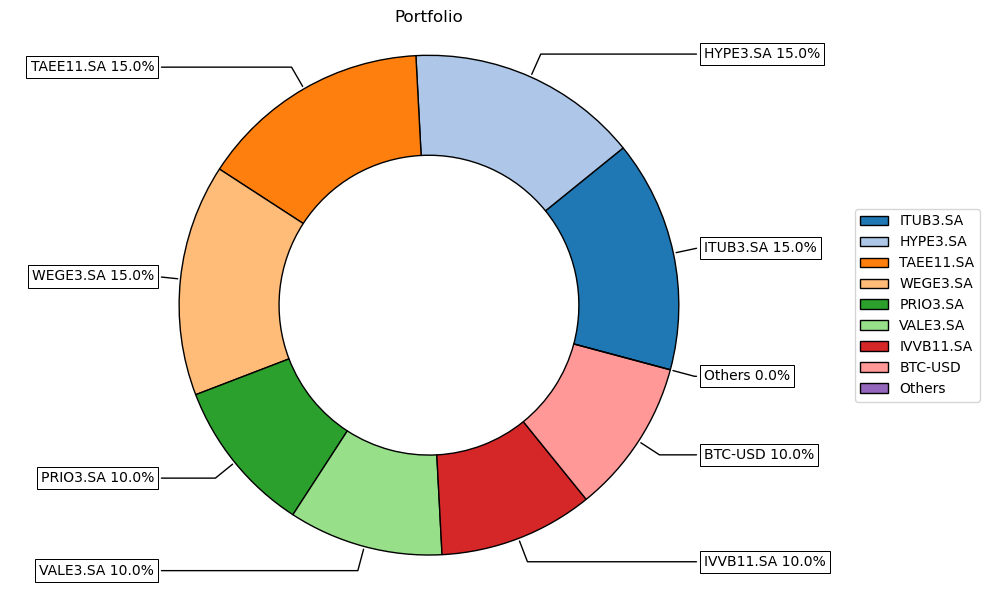

In [25]:
#Gráfico de composição dos pesos antes
fig_2, ax_2 = plt.subplots(figsize=(6,2))

rp.plot_pie(w=pesos_in, title='Portfolio', height=6, width=10,
                 cmap="tab20", ax=None)
plt.savefig('pf_weights_in.png');

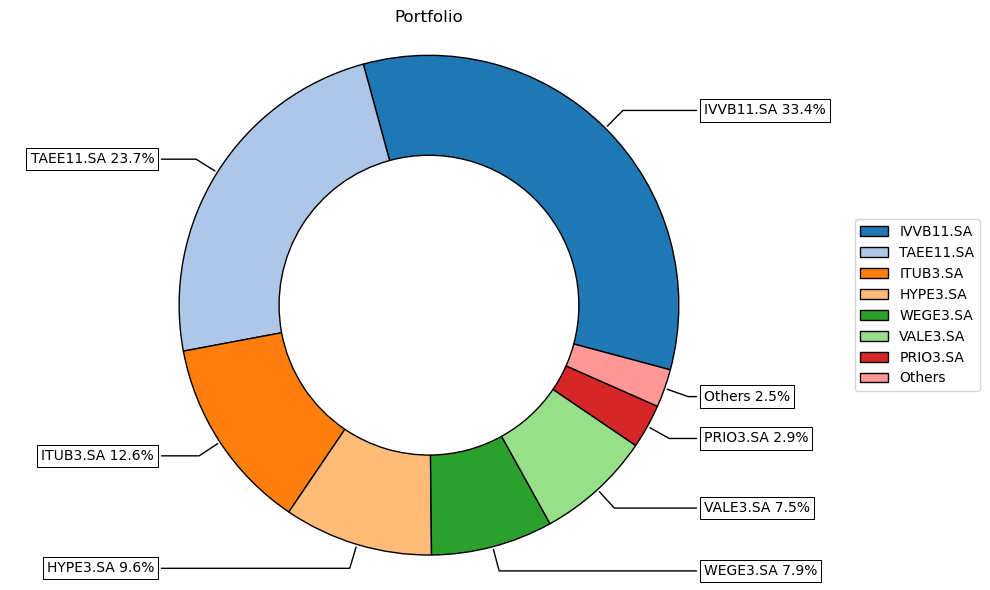

In [26]:
#Gráfico de composição dos novos pesos da carteira otimizada
fig_3, ax_3 = plt.subplots(figsize=(6,2))

rp.plot_pie(w=pesos, title='Portfolio', height=6, width=10,
                 cmap="tab20", ax=None)
plt.savefig('pf_weights_out.png');

In [28]:
#Parametros do portfolio otimizado
media_retorno = portfolio.mu
covariancia = portfolio.cov
retornos = portfolio.returns

### *Contribuição de risco por ativo*

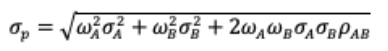

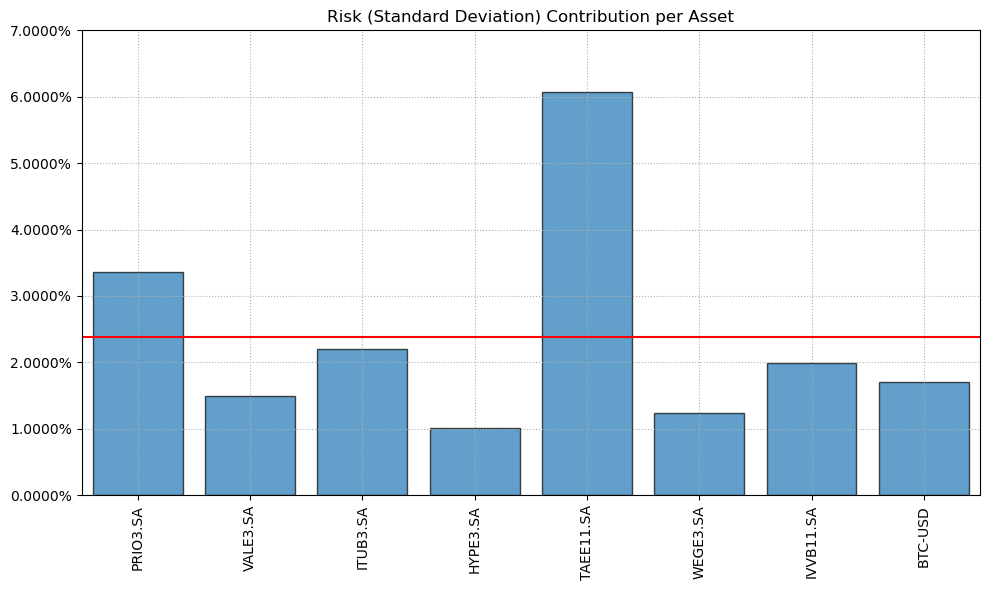

In [31]:
#Gráfico de contribuição de medida de risco por ativo carteira as is
fig_4, ax_4 = plt.subplots(figsize=(6,2))

rp.plot_risk_con(w=pesos_in, cov=cov_in, returns=retorno_carteira, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)
plt.savefig('risk_cont_in.png');

In [32]:
cov_out

Ticker,BTC-USD,HYPE3.SA,ITUB3.SA,IVVB11.SA,PRIO3.SA,TAEE11.SA,VALE3.SA,WEGE3.SA
Ticker,,,,,,,,
BTC-USD,0.0634%,0.0005%,0.0028%,0.0044%,0.0011%,-0.0013%,0.0056%,0.0027%
HYPE3.SA,0.0005%,0.0234%,0.0072%,-0.0019%,0.0058%,0.0056%,0.0031%,0.0085%
ITUB3.SA,0.0028%,0.0072%,0.0122%,-0.0023%,0.0056%,0.0036%,0.0034%,0.0043%
IVVB11.SA,0.0044%,-0.0019%,-0.0023%,0.0095%,-0.0007%,-0.0019%,0.0007%,-0.0018%
PRIO3.SA,0.0011%,0.0058%,0.0056%,-0.0007%,0.0372%,0.0032%,0.0084%,0.0061%
TAEE11.SA,-0.0013%,0.0056%,0.0036%,-0.0019%,0.0032%,0.0078%,0.0013%,0.0030%
VALE3.SA,0.0056%,0.0031%,0.0034%,0.0007%,0.0084%,0.0013%,0.0239%,0.0043%
WEGE3.SA,0.0027%,0.0085%,0.0043%,-0.0018%,0.0061%,0.0030%,0.0043%,0.0212%


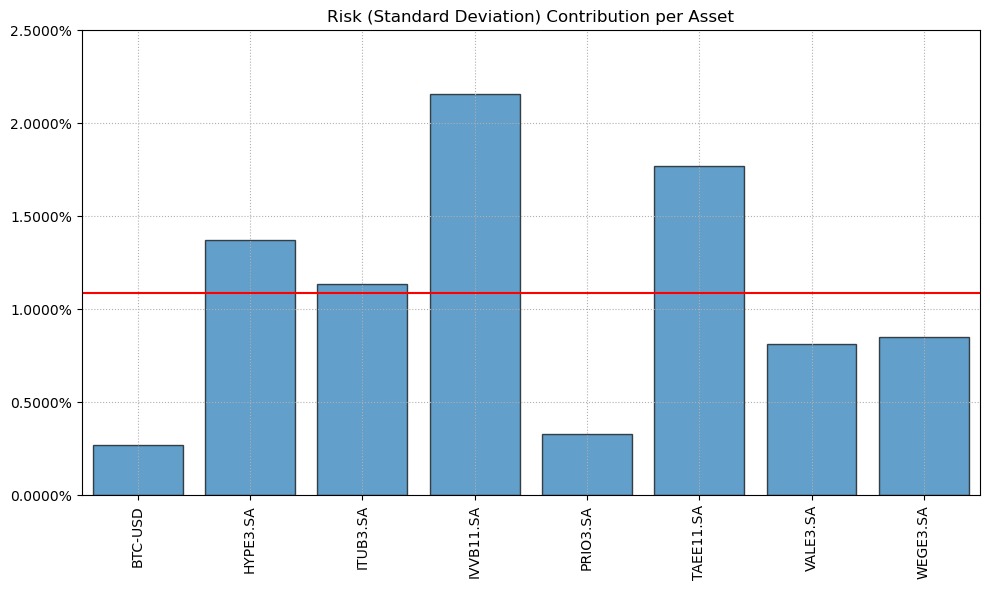

In [33]:
#Gráfico de contribuição de medida de risco por ativo carteira as os

fig_5, ax_5 = plt.subplots(figsize=(6,2))

rp.plot_risk_con(w=pesos, cov=cov_out, returns=retorno_out, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)
plt.savefig('risk_cont_out.png');

### *Histograma de retornos do portfólio*

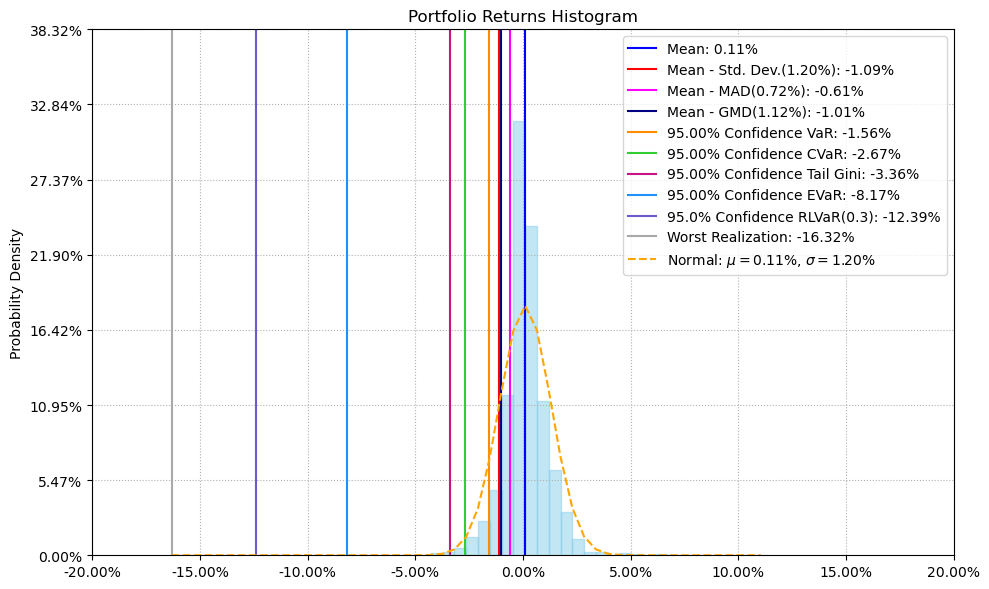

In [34]:
#Histograma dos retornos do portfolio in sample
fig_6, ax_6 = plt.subplots()

rp.plot_hist(returns=retorno_carteira, w=pesos_in, alpha=0.05, bins=50, height=6,
                  width=10, ax=None)
plt.savefig('pf_returns_in.png');

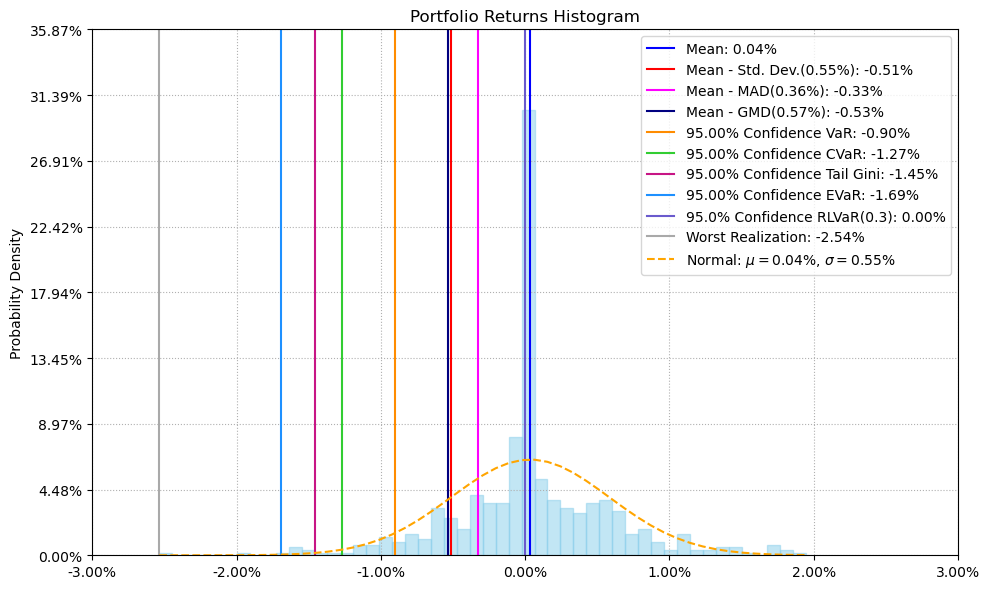

In [35]:
# Histograma dos retornos do portfolio out sample
fig_7, ax_7 = plt.subplots()

rp.plot_hist(returns=retorno_out, w=pesos, alpha=0.05, bins=50, height=6,
                  width=10, ax=None);
plt.savefig('pf_returns_out.png')

### Tabela de medidas de risco

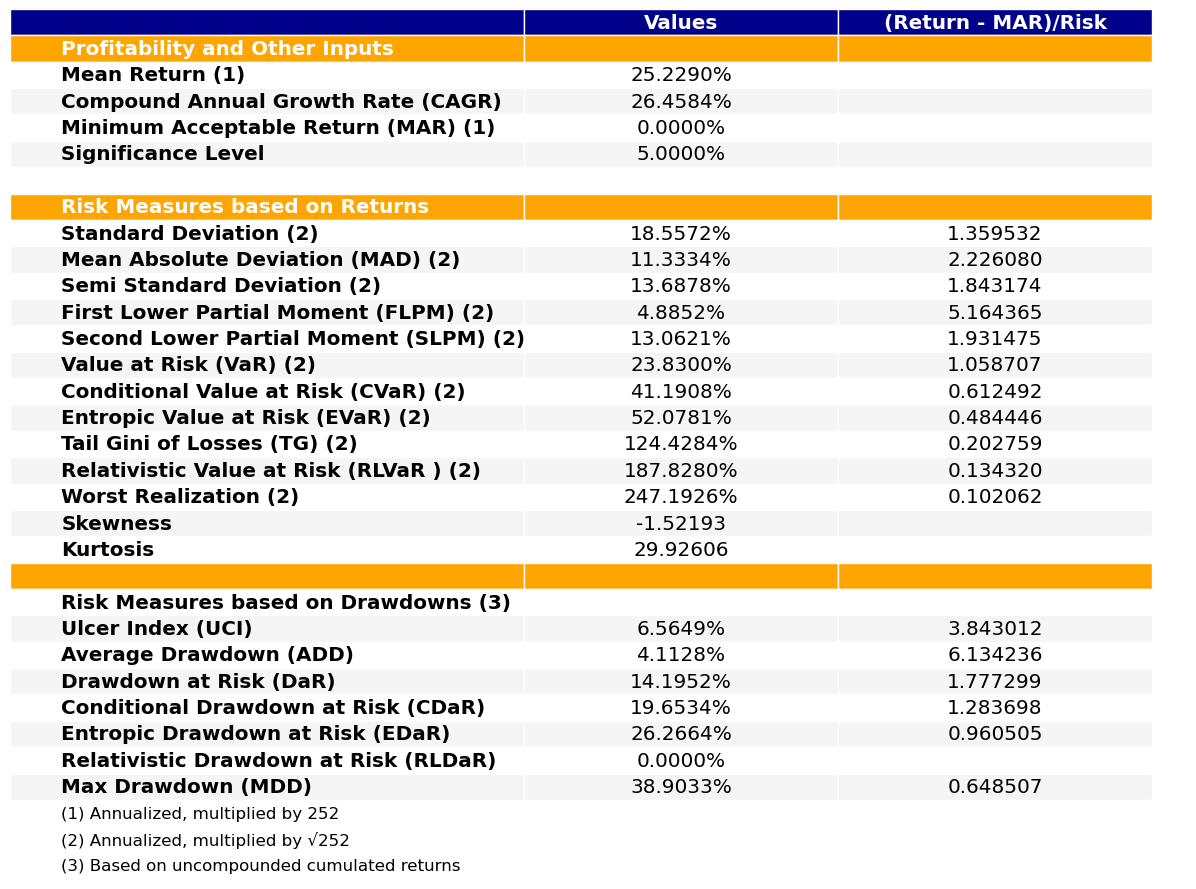

In [36]:
# Carteira in sample
fig_8, ax_8 = plt.subplots(figsize=(6,2))
rp.plot_table(returns=retorno_carteira, w=pesos_in, MAR=0, alpha=0.05, ax=None)
plt.savefig('table_in.png');

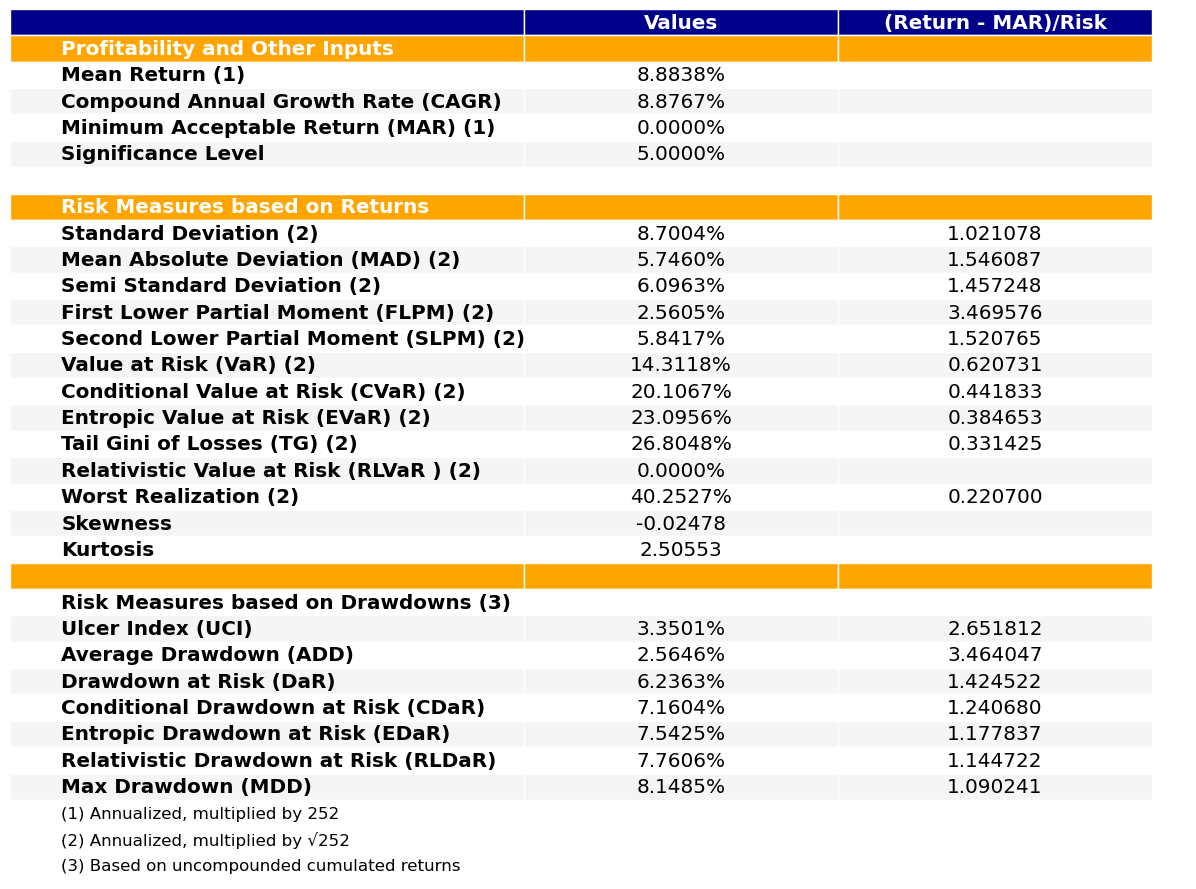

In [37]:
# Carteira out sample
fig_9, ax_9 = plt.subplots(figsize=(6,2))
rp.plot_table(returns=retorno_out, w=pesos, MAR=0, alpha=0.05, ax=None)
plt.savefig('table_out.png');

## *7. Construindo o Relatório em PDF*

- Biblioteca utilizada FPDF for Python
    https://pyfpdf.readthedocs.io/en/latest/index.html

In [40]:
# 1. Setup básico do PDF

#Criamos o pdf
pdf = FPDF()

#Adicionamos uma nova página
pdf.add_page()

#Setup de fonte 
pdf.set_font('Arial', 'B', 16)

# 2. Layout do pdf

## Título
pdf.cell(40, 10, 'Diagnóstico da sua Carteira')

## Quebra de linha
pdf.ln(20)

# 3. Tabela performance
pdf.cell(20, 7, 'Como sua carteira performou de {} até {}'.format(inicio,fim))
pdf.ln(8)
pdf.image('table_in.png', w=180, h=200)
pdf.ln(60)

# 4. Tabela peformance out-of-sample
pdf.cell(20, 7, 'Como sua carteira performou de {} até {}'.format(out_inicio,out_fim))
pdf.ln(8)
pdf.image('table_out.png', w=180, h=200)
pdf.ln(60)

# 5. Retorno Acumulado Carteira
pdf.cell(20, 7, 'Retorno Acumulado da Carteira de {} até {}'.format(out_inicio,out_fim))
pdf.ln(8)
pdf.image('cum_ret.png', w=120, h=70)
pdf.ln(10)
         
# 6. Pesos         
pdf.cell(20, 7, 'Pesos Carteira Atual')
pdf.ln(8)
pdf.image('pf_weights_in.png', w=100, h=60)
pdf.ln(10)

pdf.cell(20, 7, 'Pesos Carteira Otimizada')
pdf.ln(8)
pdf.image('pf_weights_out.png', w=100, h=60)
pdf.ln(30)
        
# 7. Contribuição de risco por ativo
pdf.cell(20, 7, 'Contribuição de risco por ativo de {} até {}'.format(inicio,fim))
pdf.ln(15)
pdf.image('risk_cont_in.png',w=150, h=80)
pdf.ln(20)
pdf.cell(20, 7, 'Contribuição de risco por ativo de {} até {}'.format(out_inicio,out_fim))
pdf.ln(15)
pdf.image('risk_cont_out.png',w=150, h=80)
pdf.ln(80)         
  
# 8. Histograma de retornos
pdf.cell(20, 7, 'Histograma de retornos de {} até {}'.format(inicio,fim))
pdf.ln(15)
pdf.image('pf_returns_in.png', w=150, h=80)
pdf.ln(20)

pdf.cell(20, 7, 'Histograma de retornos de {} até {}'.format(out_inicio,out_fim))
pdf.ln(15)
pdf.image('pf_returns_out.png', w=150, h=80)
pdf.ln(20)       
         
# 9. Disclaimer
pdf.set_font('Times', '', 6)
pdf.cell(5, 2, 'Relatório construído com a biblioteca RiskFolio https://riskfolio-lib.readthedocs.io/en/latest/index.html')

# 10. Output do PDF file
pdf.output('diagnostico_de_carteira.pdf', 'F')

''